In [ ]:
install.packages('tidyverse')

In [ ]:
library(tidyverse)

### Flujo de trabajo

Usamos el paquete [`caret`](https://topepo.github.io/caret/data-splitting.html) que implementa funciones utilitarias varias.

In [ ]:
install.packages('caret')

In [1]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [3]:
set.seed(3456)

train_index <- createDataPartition(iris$Species, p=0.8, list=FALSE)

In [4]:
train <- iris[ train_index,]
test  <- iris[-train_index,]

### PCA

In [17]:
iris.pca <- prcomp(train[, 1:2], center=TRUE, scale.=TRUE) 

In [11]:
summary(iris.pca)

Importance of components%s:
                              PC1         PC2         PC3         PC4
Standard deviation     1.71034404 0.950027275 0.386765072 0.150280432
Proportion of Variance 0.73132000 0.225640000 0.037400000 0.005650000
Cumulative Proportion  0.73132000 0.956960000 0.994350000 1.000000000

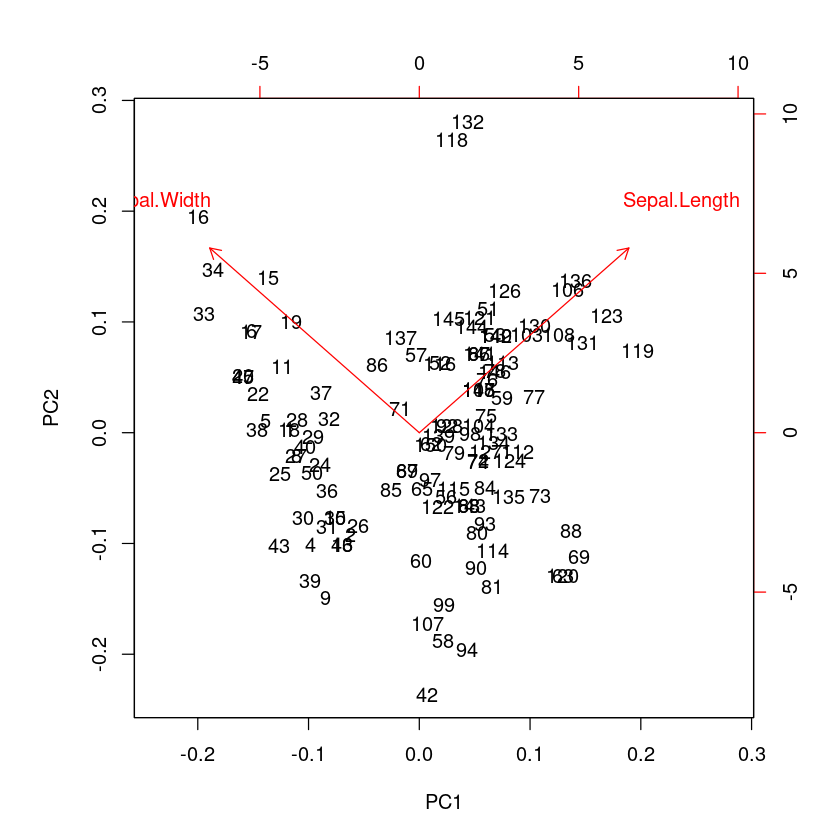

In [18]:
biplot(iris.pca)

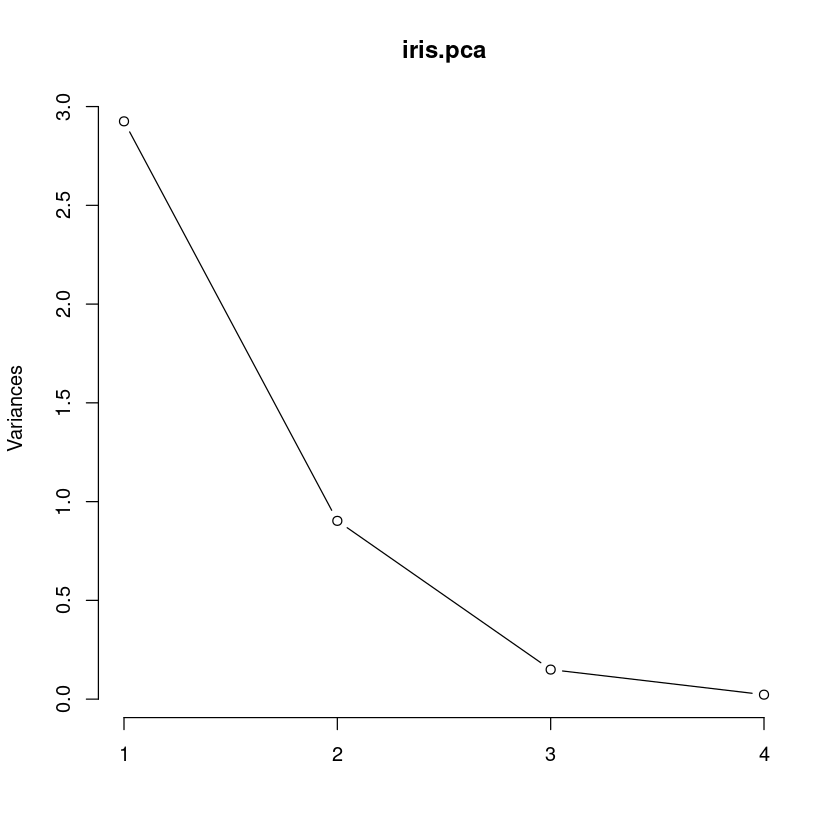

In [12]:
plot(iris.pca, type='l')

### Con caret

In [9]:
#trans = preProcess(train[, 1:4], method=c('center', 'scale', 'pca'), thresh=0.6)
#iris.pca = predict(trans, test[, 1:4])

### SVM

In [ ]:
install.packages('e1071')

In [21]:
library(e1071)

In [22]:
modelo <- svm(Species ~ ., data=train, kernel='linear', cost=1, scale=FALSE)

In [23]:
summary(modelo)


Call:
svm(formula = Species ~ ., data = train, kernel = "linear", cost = 1, 
    scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.25 

Number of Support Vectors:  26

 ( 3 12 11 )


Number of Classes:  3 

Levels: 
 setosa versicolor virginica




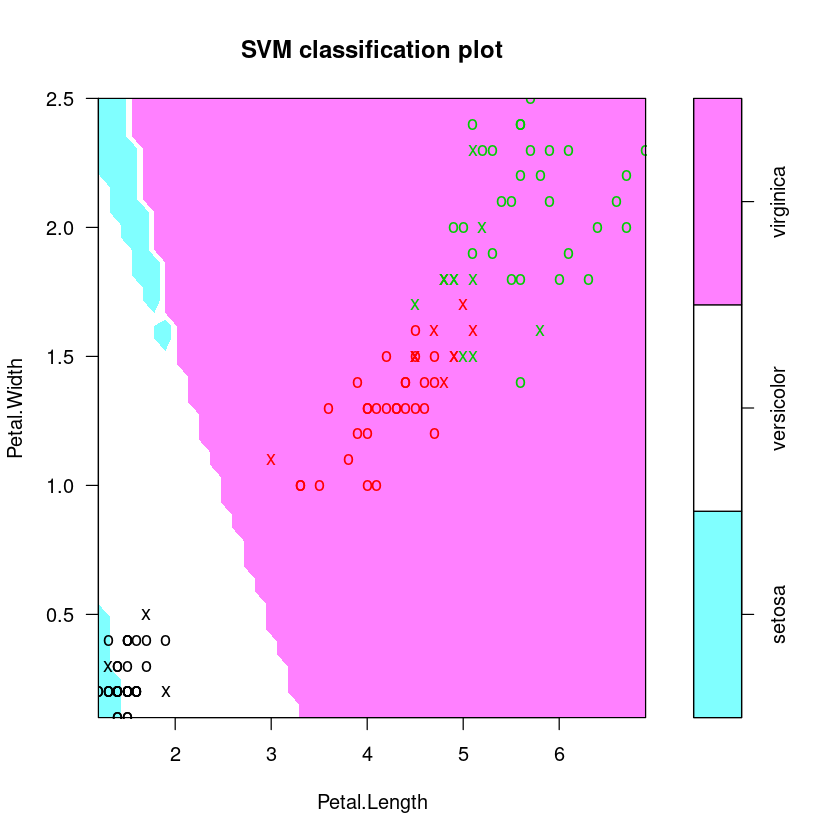

In [24]:
plot(modelo, train, Petal.Width ~ Petal.Length)

In [25]:
x <- subset(test, select=-Species)
y <- test$Species

In [26]:
pred <- predict(modelo, x)

In [27]:
table(pred, y)

            y
pred         setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

In [28]:
confusionMatrix(pred, y)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                          
               Accuracy : 1               
                 95% CI : (0.884296692, 1)
    No Information Rate : 0.333333333     
    P-Value [Acc > NIR] : 4.85693575e-15  
                                          
                  Kappa : 1               
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity            1.000000000       1.000000000      1.000000000
Specificity            1.000000000       1.000000000      1.000000000
Pos Pred Value         1.000000000       1.000000000      1.000000000
Neg Pred Value         1.000000000       1.000000000      1.000000000
Prevalence             0.333333333       0.3

In [ ]:
#> tune . out = tune ( svm , y∼. , data = dat , kernel =" linear " ,
#ranges = list ( cost = c (0.001 , 0.01 , 0.1 , 1 ,5 ,10 ,100) ) )

In [ ]:
#summary(tune.out)

#bestmod = tune . out$best . model
#> summary ( bestmod )

### Recursos

http://www.r-bloggers.com


### Textos

- [An Introduction to R](https://cran.r-project.org/doc/manuals/R-intro.pdf) — W. N. Venables, D. M. Smith, R Core Team.

Más de programación, tiene modelos lineales.


- [R for Data Science](http://r4ds.had.co.nz) — Garrett Grolemund, Hadley Wickham.

Lo recomiendan en RStudio.


- [Introduction to Probability and Statistics Using R](https://cran.r-project.org/web/packages/IPSUR/vignettes/IPSUR.pdf) — G. Jay Kerns.

Mmm.


- [Advanced R](http://adv-r.had.co.nz) — Hadley Wickham.

Me sirvió la parte de estructuras de datos.


- [Vectores atómicos](http://arrgh.tim-smith.us/atomic.html)

Lectura obligada.


- [An Introduction to Statistical Learning with Applications in R](http://www-bcf.usc.edu/~gareth/ISL) — Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.

Es el que usé para aprendizaje automático. Está el **Elements of Statistical Learning** que es más avanzado.


- [Advanced Data Analysis from an Elementary Point of View](http://www.stat.cmu.edu/~cshalizi/ADAfaEPoV) — Cosma Rohilla Shalizi.

Cubre muchos tópicos avanzados, siendo exigente, desde un punto de vista elemental.


- Más textos:
  * https://r-dir.com/learn/e-books.html
  * https://www.ossblog.org/grasp-r-programming-open-source-books
  * http://freecomputerbooks.com/langRBooks.html